In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from FreqRespPy.data_search import get_target_file_list, open_target_file
from scipy import signal
from matplotlib import cm

In [2]:
def to_linear(x):
     return 10**(x / 10.0)    

In [3]:
def to_dB(x):
    return 10 * np.log10(x)

In [4]:
def mean_freq_response(target_df):
    target_df = target_df.apply(pd.to_numeric)
    
    target_df_lin = to_linear(target_df)
    row_means_lin = target_df_lin.mean(axis=1)
    row_means_sem = target_df_lin.sem(axis=1)
  #  plt.subplot(2,1,1)
  #  plt.ylabel('Mean Sigma')
  #  plt.hist(row_means_lin)
  #  plt.subplot(2,1,2)
  #  plt.ylabel('Sigma SEM')
  #  plt.hist(row_means_sem)
  #  plt.show()
    row_means = to_dB(row_means_lin)
    return [row_means_lin, row_means_sem]

In [5]:
data_directory = '/Users/kevinb/Documents/GitHub/FreqResp/data/'
data_files = get_target_file_list(data_directory)
print(data_files)

['FT_region_EV10_EVD_EV10comp0_region2614.csv', 'FT_region_EV10_EVD_EV10comp1_region2614.csv', 'FT_region_EV10_EVD_EV10comp2_region2614.csv', 'FT_region_EV10_EVD_EV10comp3_region2614.csv', 'FT_region_EV10_EVD_EV10raw_region2614.csv', 'FT_region_EV9_EVD_comp0_region2614.csv', 'FT_region_EV9_EVD_comp1_region2614.csv', 'FT_region_EV9_EVD_comp2_region2614.csv', 'FT_region_EV9_EVD_comp3_region2614.csv', 'FT_region_EV9_EVD_raw_region2614.csv']


In [6]:
mean_response_output = []
mean_sem_output = []

for file in data_files:
    meta, df = open_target_file(data_directory, file)
    #   print(df)
    #   print(df.dtypes)
    
    mean_response, mean_sem = mean_freq_response(df)
    mean_response_output.append(mean_response)
    mean_sem_output.append(mean_sem)
    

In [7]:
#mean_response_output

In [8]:
df_output_mean = pd.concat(mean_response_output, axis=1)
df_output_sem = pd.concat(mean_sem_output, axis=1)

In [9]:
type(df_output_mean)
df_output_mean.shape
df_output_mean.columns.values
df_output_mean.columns = [file.replace(' ', '_') for file in data_files]

df_output_sem.shape
df_output_sem.columns.values
df_output_sem.columns = [file.replace(' ', '_') for file in data_files]

In [10]:
data_files = [file.replace(' ', '_') for file in data_files]
data_files = [file[:-4] for file in data_files if file.endswith('.csv')]
data_files = [file[10:] for file in data_files if file.startswith('FT_region_')]

In [11]:
df_output_mean.columns = data_files
df_output_mean.columns

Index(['EV10_EVD_EV10comp0_region2614', 'EV10_EVD_EV10comp1_region2614',
       'EV10_EVD_EV10comp2_region2614', 'EV10_EVD_EV10comp3_region2614',
       'EV10_EVD_EV10raw_region2614', 'EV9_EVD_comp0_region2614',
       'EV9_EVD_comp1_region2614', 'EV9_EVD_comp2_region2614',
       'EV9_EVD_comp3_region2614', 'EV9_EVD_raw_region2614'],
      dtype='object')

In [12]:
df_output_sem.columns = data_files
df_output_sem.columns

Index(['EV10_EVD_EV10comp0_region2614', 'EV10_EVD_EV10comp1_region2614',
       'EV10_EVD_EV10comp2_region2614', 'EV10_EVD_EV10comp3_region2614',
       'EV10_EVD_EV10raw_region2614', 'EV9_EVD_comp0_region2614',
       'EV9_EVD_comp1_region2614', 'EV9_EVD_comp2_region2614',
       'EV9_EVD_comp3_region2614', 'EV9_EVD_raw_region2614'],
      dtype='object')

In [13]:
target1_mean = 10*np.log10(df_output_mean.iloc[:,0])   # Fish1
target1_low_sem = 10*np.log10(df_output_mean.iloc[:,0] - df_output_sem.iloc[:,0])   
target1_upp_sem = 10*np.log10(df_output_mean.iloc[:,0] + df_output_sem.iloc[:,0])  

target2_mean = 10*np.log10(df_output_mean.iloc[:,1])   # Fish1 
target2_low_sem = 10*np.log10(df_output_mean.iloc[:,1] - df_output_sem.iloc[:,1])  
target2_upp_sem = 10*np.log10(df_output_mean.iloc[:,1] + df_output_sem.iloc[:,1])  

target3_mean= 10*np.log10(df_output_mean.iloc[:,2])   # Fish2
target3_low_sem= 10*np.log10(df_output_mean.iloc[:,2] - df_output_sem.iloc[:,2])   
target3_upp_sem= 10*np.log10(df_output_mean.iloc[:,2] + df_output_sem.iloc[:,2])  

target4_mean= 10*np.log10(df_output_mean.iloc[:,3])   # Fish2
target4_low_sem= 10*np.log10(df_output_mean.iloc[:,3] - df_output_sem.iloc[:,3]) 
target4_upp_sem= 10*np.log10(df_output_mean.iloc[:,3] + df_output_sem.iloc[:,3])

target5_mean = 10*np.log10(df_output_mean.iloc[:,4])   # Fish1
target5_low_sem = 10*np.log10(df_output_mean.iloc[:,4] - df_output_sem.iloc[:,4])   
target5_upp_sem = 10*np.log10(df_output_mean.iloc[:,4] + df_output_sem.iloc[:,4])  

target6_mean = 10*np.log10(df_output_mean.iloc[:,5])   # Fish1 
target6_low_sem = 10*np.log10(df_output_mean.iloc[:,5] - df_output_sem.iloc[:,5])  
target6_upp_sem = 10*np.log10(df_output_mean.iloc[:,5] + df_output_sem.iloc[:,5])  

target7_mean= 10*np.log10(df_output_mean.iloc[:,6])   # Fish2
target7_low_sem= 10*np.log10(df_output_mean.iloc[:,6] - df_output_sem.iloc[:,6])   
target7_upp_sem= 10*np.log10(df_output_mean.iloc[:,6] + df_output_sem.iloc[:,6])  

target8_mean= 10*np.log10(df_output_mean.iloc[:,7])   # Fish2
target8_low_sem= 10*np.log10(df_output_mean.iloc[:,7] - df_output_sem.iloc[:,7]) 
target8_upp_sem= 10*np.log10(df_output_mean.iloc[:,7] + df_output_sem.iloc[:,7])

target9_mean= 10*np.log10(df_output_mean.iloc[:,8])   # Fish2
target9_low_sem= 10*np.log10(df_output_mean.iloc[:,8] - df_output_sem.iloc[:,8]) 
target9_upp_sem= 10*np.log10(df_output_mean.iloc[:,8] + df_output_sem.iloc[:,8])

target10_mean= 10*np.log10(df_output_mean.iloc[:,9])   # Fish2
target10_low_sem= 10*np.log10(df_output_mean.iloc[:,9] - df_output_sem.iloc[:,9]) 
target10_upp_sem= 10*np.log10(df_output_mean.iloc[:,9] + df_output_sem.iloc[:,9])

freq=df.index

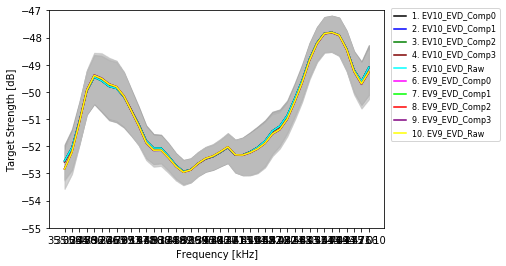

In [14]:
plt.xlabel('Frequency [kHz]')
plt.ylabel('Target Strength [dB]')

plt.fill_between(freq, target1_low_sem,target1_upp_sem,color='gray', alpha=0.2)
plt.fill_between(freq, target2_low_sem,target2_upp_sem,color='gray', alpha=0.2)
plt.fill_between(freq, target3_low_sem,target3_upp_sem,color='gray', alpha=0.2)
plt.fill_between(freq, target4_low_sem,target4_upp_sem,color='gray', alpha=0.2)
plt.fill_between(freq, target5_low_sem,target5_upp_sem,color='silver',alpha=0.2)
plt.fill_between(freq, target6_low_sem,target6_upp_sem,color='silver',alpha=0.2)
plt.fill_between(freq, target7_low_sem,target7_upp_sem,color='silver',alpha=0.2)
plt.fill_between(freq, target8_low_sem,target8_upp_sem,color='silver',alpha=0.2)
plt.fill_between(freq, target9_low_sem,target9_upp_sem,color='silver',alpha=0.2)
plt.fill_between(freq, target10_low_sem,target10_upp_sem,color='silver',alpha=0.2)

plt.plot(freq,target1_mean,'-',color='black')
plt.plot(freq,target2_mean,'-',color='blue')
plt.plot(freq,target3_mean,'-',color='green')
plt.plot(freq,target4_mean,'-',color='maroon')
plt.plot(freq,target5_mean,'-',color='cyan')
plt.plot(freq,target6_mean,'-',color='fuchsia')
plt.plot(freq,target7_mean,'-',color='lime')
plt.plot(freq,target8_mean,'-',color='red')
plt.plot(freq,target9_mean,'-',color='purple')
plt.plot(freq,target10_mean,'-',color='yellow')

plt.ylim(-55,-47)

# legend
plt.legend(('1. EV10_EVD_Comp0','2. EV10_EVD_Comp1','3. EV10_EVD_Comp2',
           '4. EV10_EVD_Comp3','5. EV10_EVD_Raw', '6. EV9_EVD_Comp0',
           '7. EV9_EVD_Comp1','8. EV9_EVD_Comp2','9. EV9_EVD_Comp3','10. EV9_EVD_Raw'),
           loc=(1.02, 0.4), handlelength=1.5, fontsize=8)


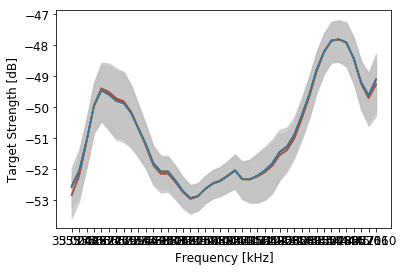

In [15]:
## need to integrate file names into this to loop across fish tracks
i = 0
while i < len(data_files):
    plt.rcParams["font.size"] = 12
    plt.plot(freq, (10*np.log10(df_output_mean.iloc[:,i])),zorder=len(data_files)-i) 
#   plt.plot (freq, (10*np.log10(df_output_mean.iloc[:,i] - df_output_sem.iloc[:,i])))
    plt.fill_between(freq, 10*np.log10(df_output_mean.iloc[:,i] - df_output_sem.iloc[:,i]),
                     10*np.log10(df_output_mean.iloc[:,i] + df_output_sem.iloc[:,i]),
                     color='silver', alpha=0.2)          
    plt.xlabel('Frequency [kHz]')
    plt.ylabel('Target Strength [dB]')
#   print (i)
    i = i + 1
   

In [16]:
df_output_sem.columns

Index(['EV10_EVD_EV10comp0_region2614', 'EV10_EVD_EV10comp1_region2614',
       'EV10_EVD_EV10comp2_region2614', 'EV10_EVD_EV10comp3_region2614',
       'EV10_EVD_EV10raw_region2614', 'EV9_EVD_comp0_region2614',
       'EV9_EVD_comp1_region2614', 'EV9_EVD_comp2_region2614',
       'EV9_EVD_comp3_region2614', 'EV9_EVD_raw_region2614'],
      dtype='object')

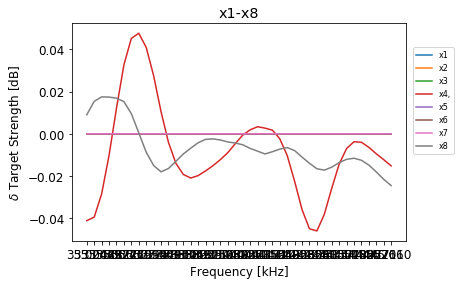

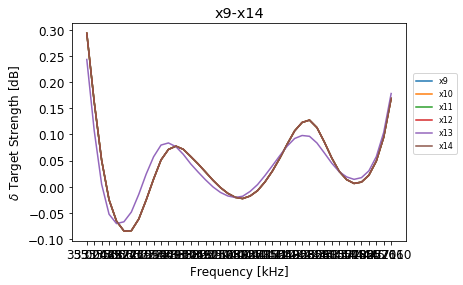

In [17]:
a=10*np.log10(df_output_mean.iloc[:,0])   #EV10_EVD_comp0
b=10*np.log10(df_output_mean.iloc[:,1])   #EV10_EVD_comp1
c=10*np.log10(df_output_mean.iloc[:,2])   #EEV10_EVD_comp2
d=10*np.log10(df_output_mean.iloc[:,3])   #EV10_EVD_comp3
e=10*np.log10(df_output_mean.iloc[:,4])   #EV10_EVD_raw
f=10*np.log10(df_output_mean.iloc[:,5])   #EV9_EVD_comp0
g=10*np.log10(df_output_mean.iloc[:,6])   #EV9_EVD_comp1
h=10*np.log10(df_output_mean.iloc[:,7])   #EV9_EVD_comp2
i=10*np.log10(df_output_mean.iloc[:,8])   #EV9_EVD_comp3
j=10*np.log10(df_output_mean.iloc[:,9])   #EV9_EVD_raw


# No diffs b/w Comp0 and Comp1 
x1= a-e     #EV10_EVD_comp0 - EV10_EVD_raw
x2= b-e     #EV10_EVD_comp1 - EV10_EVD_raw
x3= c-e     #EEV10_EVD_comp2 - EV10_EVD_raw    
x4= d-e     #EEV10_EVD_comp3 - EV10_EVD_raw    
x5= f-j     #EV9_EVD_comp0 - EV9_EVD_raw
x6= g-j     #EV9_EVD_comp1 - EV9_EVD_raw
x7= h-j     #EV9_EVD_comp2 -  EV9_EVD_raw     
x8= i-j     #EV9_EVD_comp3 - EV9_EVD_raw      
x9= e-j     #EV10_EVD_raw - EV9_EVD_raw       
x10= a-f    #EV10_EVD_comp0 - EV9_EVD_comp0   
x11= b-g    #EV10_EVD_comp1 - EV9_EVD_comp1   
x12= c-h    #EV10_EVD_comp2 - EV9_EVD_comp2   
x13= d-i    #EV10_EVD_comp3 - EV9_EVD_comp3
x14= e-j    #EV10_EVD_raw - EV9_EVD_raw

# X1-X8
#plt.subplot(2,2,1)
plt.figure(1)
plt.title('x1-x8')
out1=[x1,x2,x3,x4,x5,x6,x7,x8]
outz1=pd.DataFrame(out1)
m = 0
while m < len(outz1):
   plt.rcParams["font.size"] = 12
   plt.plot(freq, outz1.iloc[m,:]) 
   plt.xlabel('Frequency [kHz]')
#   plt.ylim(-0.04,0.03)
   plt.ylabel('$\delta$ Target Strength [dB]')
   m = m + 1
plt.legend(('x1','x2','x3','x4,','x5','x6','x7','x8'),loc=(1.02, 0.4), handlelength=2, fontsize=8)

    
# X9-x14
#plt.subplot(2,2,3)
plt.figure(2)
plt.title('x9-x14')
out2=[x9,x10,x11,x12,x13,x14]
outz2=pd.DataFrame(out2)
m = 0
while m < len(outz2):
   plt.rcParams["font.size"] = 12
   plt.plot(freq, outz2.iloc[m,:]) 
   plt.xlabel('Frequency [kHz]')
 #  plt.ylim(-1.0,2.5)
   plt.ylabel('$\delta$ Target Strength [dB]')
   m = m + 1
plt.legend(('x9','x10','x11','x12','x13','x14'),
           loc=(1.02, 0.4), handlelength=2, fontsize=8)
